<a href="https://colab.research.google.com/github/PrzemyslawSarnacki/NumericalMethods/blob/master/NewtonInterpolation.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np 


In [2]:
x_arr = np.array([0, 1, 2, 4], float)
y_arr = np.array([1, 2, 2, 3], float)

Implementacja obliczeń współczynników (wynikiem jest tablca zawierająca współczynniki a)

In [3]:
def newton_coefs(x_arr, y_arr):
    n = len(x_arr)
    fi = np.zeros((n,n), float)
    # fill fi[xi] with y_arr (more efficient way)
    fi[:, 0] = y_arr

    # add new fi elements based on previous fi elements 
    for j in range(1, n):
        for i in range(j,n):
            fi[i,j] = float(fi[i,j-1]-fi[i-1,j-1])/float(x_arr[i]-x_arr[i-j])
    # get diagonal from fi 
    a = fi.diagonal()
    return a

Implementacja numeryczna (wynikiem jest tablica zawierająca wyniki w przedziale (od min zbioru do max) )

In [4]:
def newton(x_arr, y_arr):
    # declare interval
    x_interval = np.linspace(x_arr[0], x_arr[-1])
    # declare output array 
    y_result = np.array([], float)
    # get coefficients
    a = newton_coefs(x_arr, y_arr)
    # iterate through interval
    for xp in x_interval:
        # first point
        yp = a[0]
        for xi, ai in zip(x_arr, a[1:]):
        # calculate result for certain point
        # p is calculated by multiplying yi times x in certain point (from interval)
            yp += np.prod(xp - x_arr[x_arr <= xi]) * ai
        # append to output array
        y_result = np.append(y_result, yp)
    return y_result


Przetestujmy funkcję zawierającą obliczenia symboliczne (jak widzimy wynikiem są współczynniki Newtona z macierzy fi)

In [5]:
newton_coefs(x_arr, y_arr)

array([ 1.        ,  1.        , -0.5       ,  0.16666667])

Przetestujmy funkcję numeryczną

In [6]:
newton(x_arr, y_arr)

array([1.        , 1.14308664, 1.27338949, 1.39145254, 1.49781979,
       1.59303521, 1.67764282, 1.75218659, 1.81721052, 1.87325859,
       1.92087481, 1.96060315, 1.99298762, 2.01857219, 2.03790087,
       2.05151765, 2.05996651, 2.06379145, 2.06353645, 2.05974551,
       2.05296263, 2.04373178, 2.03259696, 2.02010217, 2.00679139,
       1.99320861, 1.97989783, 1.96740304, 1.95626822, 1.94703737,
       1.94025449, 1.93646355, 1.93620855, 1.94003349, 1.94848235,
       1.96209913, 1.98142781, 2.00701238, 2.03939685, 2.07912519,
       2.12674141, 2.18278948, 2.24781341, 2.32235718, 2.40696479,
       2.50218021, 2.60854746, 2.72661051, 2.85691336, 3.        ])

Niestety metoda Newtona nie została zaimplementowana w żadnej z pythonowych bibliotek (przynajmniej wg. mojej wiedzy). W zastępstwie porównamy nasz wynik to do funkcji otrzymanej z kalkulatora online dostępnego pod adresem https://www.dcode.fr/newton-interpolating-polynomial 

In [7]:
def func(x):
    return x**3/6 - x**2 + 11/6 * x + 1

Porównanie powyższych działań na wykresie 

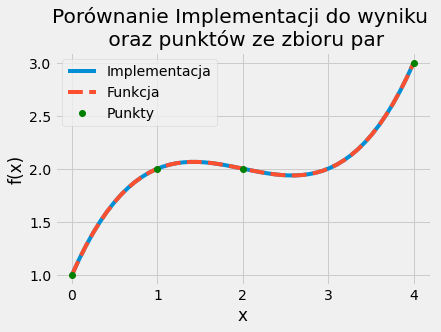

In [8]:
plt.style.use('fivethirtyeight')

interval = np.linspace(x_arr[0], x_arr[-1])
plt.plot(interval, newton(x_arr, y_arr))
plt.plot(interval, func(interval), linestyle="dashed")
plt.plot(x_arr, y_arr, "o", color="green")
plt.title("Porównanie Implementacji do wyniku \n oraz punktów ze zbioru par")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend(["Implementacja", "Funkcja", "Punkty"])

Jak widzimy wyniki pokrywają się. Możemy zauważyć, że wynik metody Newtona zgadza się z tym z Lagrange'a.